# IMDB 데이터 실습 
  - Conv 1D 와 LSTM 성능 평가 


# Conv 1D 
- 시퀀스 데이터의 특징을 추출하기 위한 방법 

In [13]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence 

max_features= 100000
max_len = 500

In [14]:
print('Loading data....')

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train_sequences')
print(len(x_test), 'test_sequences')


Loading data....
25000 train_sequences
25000 test_sequences


In [15]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape: ', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape:  (25000, 500)
x_test shape: (25000, 500)


#### Conv 1D Modeling 
- 1D 컨브넷은 2D 컨브넷과 미슷한 방식으로 구성 
  - Conv1D 와 MaxPooling 1D층을 쌓고 전역 풀링층이나 Flatten층으로 마침 
  - 1D 컨브넷에 큰 합성곱 윈도우를 사용할 수 있음 
    - 1D 합성곱에 크기 7이나 9의 윈도우를 사용할 수 있음 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
# GlobalMaxPooling1d : 2차원 형태를 1차원 형태로 바꿔주어 Dense층과 연결을 가능하게 한다.
# Flatten층을 사용해도 된다 
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 128)          12800000  
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 12,835,937
Trainable params: 12,835,937
Non-trainable params: 0
__________________________________________

In [25]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split= 0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
157/157 [==============================] - 81s 512ms/step - loss: 0.6921 - acc: 0.5391 - val_loss: 0.6908 - val_acc: 0.5588
Epoch 2/10
157/157 [==============================] - 80s 510ms/step - loss: 0.6835 - acc: 0.7074 - val_loss: 0.6840 - val_acc: 0.6426
Epoch 3/10
157/157 [==============================] - 80s 509ms/step - loss: 0.6653 - acc: 0.8007 - val_loss: 0.6555 - val_acc: 0.7278
Epoch 4/10
157/157 [==============================] - 81s 515ms/step - loss: 0.6073 - acc: 0.8146 - val_loss: 0.5643 - val_acc: 0.8136
Epoch 5/10
157/157 [==============================] - 83s 526ms/step - loss: 0.4839 - acc: 0.8400 - val_loss: 0.4370 - val_acc: 0.8380
Epoch 6/10
157/157 [==============================] - 81s 514ms/step - loss: 0.3642 - acc: 0.8673 - val_loss: 0.3616 - val_acc: 0.8544
Epoch 7/10
157/157 [==============================] - 81s 514ms/step - loss: 0.2936 - acc: 0.8902 - val_loss: 0.3275 - val_acc: 0.8608
Epoch 8/10
157/157 [==============================] - 8

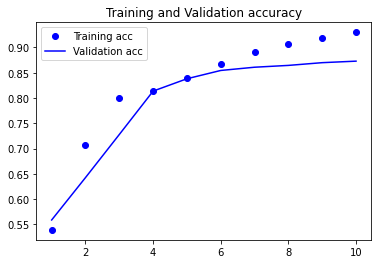

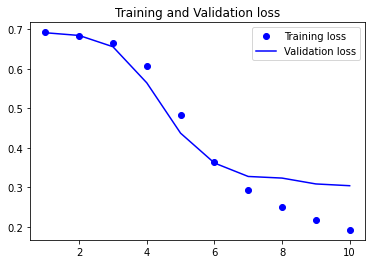

<Figure size 432x288 with 0 Axes>

In [26]:
# 정확성 확인 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

# accuracy 그래프 
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# loss 그래프 
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()

- 정확도 : 82 % 
  - 검증 정확도는 LSTM보다 조금 낮지만 CPU나 GPU에서 더 빠르게 실행됨 
  - 단어 수준의 감성분류 작업에 RNN을 대신하여 빠르고 경제적인 1D컨브넷을 사용할 수 있음을 보여줌 

### LSTM
- 정확성 : 88% 정도

In [28]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [29]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 62s 383ms/step - loss: 0.5036 - acc: 0.7695 - val_loss: 0.4387 - val_acc: 0.7954
Epoch 2/10
157/157 [==============================] - 60s 381ms/step - loss: 0.2656 - acc: 0.8988 - val_loss: 0.2750 - val_acc: 0.8910
Epoch 3/10
157/157 [==============================] - 59s 376ms/step - loss: 0.1905 - acc: 0.9316 - val_loss: 0.5689 - val_acc: 0.8190
Epoch 4/10
157/157 [==============================] - 58s 372ms/step - loss: 0.1384 - acc: 0.9511 - val_loss: 0.2820 - val_acc: 0.8938
Epoch 5/10
157/157 [==============================] - 58s 372ms/step - loss: 0.1070 - acc: 0.9658 - val_loss: 0.2999 - val_acc: 0.8942
Epoch 6/10
157/157 [==============================] - 58s 373ms/step - loss: 0.0811 - acc: 0.9746 - val_loss: 0.4868 - val_acc: 0.8442
Epoch 7/10
157/157 [==============================] - 59s 375ms/step - loss: 0.0654 - acc: 0.9775 - val_loss: 0.4779 - val_acc: 0.8554
Epoch 8/10
157/157 [==============================] - 5

In [30]:
# 모델 평가하기
model.evaluate(x_test, y_test)

782/782 [==============================] - 32s 41ms/step - loss: 0.4771 - acc: 0.8274


[0.4770931303501129, 0.8274400234222412]

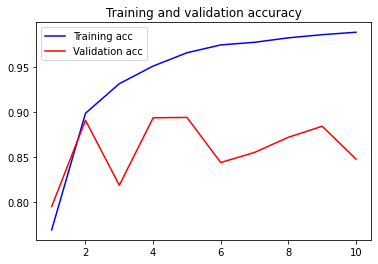

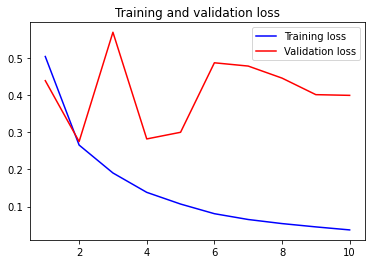

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()